K-Means Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('cluster_data1.csv')
data = df[['X1', 'X2', 'X3', 'X4']].values

In [ ]:
df.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [ ]:
# Checking for missing values
print(df.isnull().sum())

X1    0
X2    0
X3    0
X4    0
dtype: int64


In [ ]:
# Removing duplicate rows if present
df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['X1', 'X2', 'X3', 'X4']])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
data = scaler.fit_transform(df[['X1', 'X2', 'X3', 'X4']])

In [ ]:
from scipy import stats

# Remove outliers based on the Z-score method
z_scores = np.abs(stats.zscore(df[['X1', 'X2', 'X3', 'X4']]))
df = df[(z_scores < 3).all(axis=1)]

In [ ]:
# printing correlation matrix
correlation_matrix = df[['X1', 'X2', 'X3', 'X4']].corr()
print(correlation_matrix)

          X1        X2        X3        X4
X1  1.000000 -0.108945  0.874808  0.818992
X2 -0.108945  1.000000 -0.409444 -0.346552
X3  0.874808 -0.409444  1.000000  0.961693
X4  0.818992 -0.346552  0.961693  1.000000


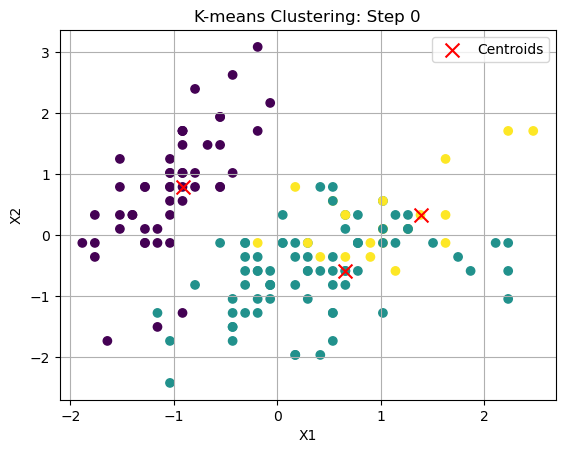

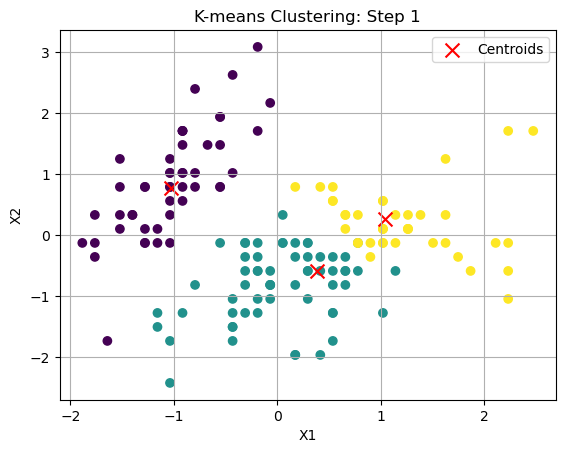

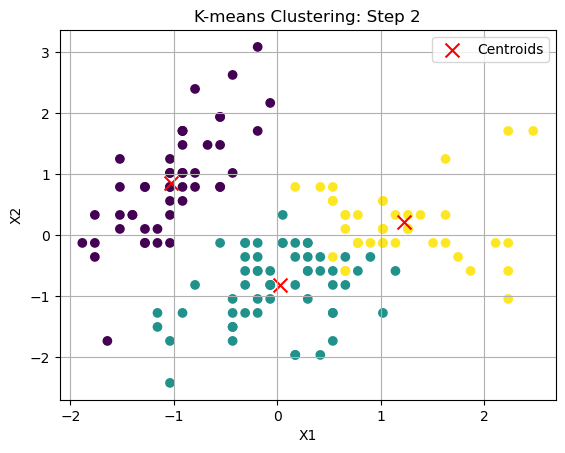

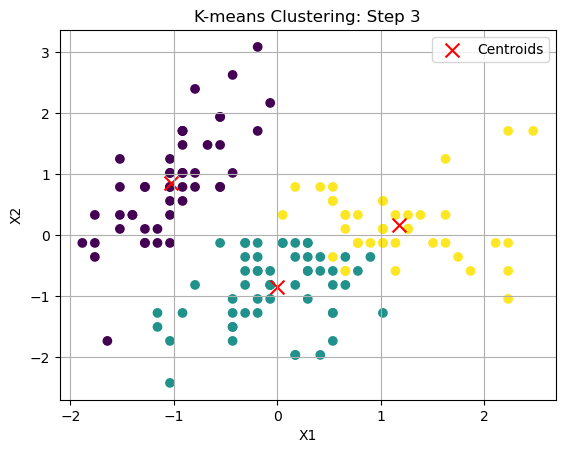

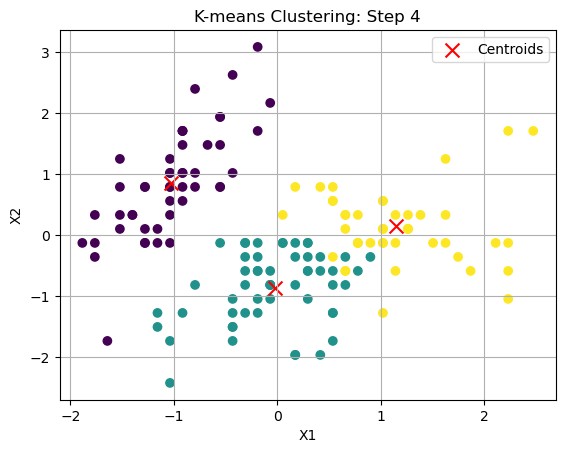

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the number of clusters K as mentioned it is 3 and initializing random seed
K = 3
np.random.seed(123)

# Randomly initializing centroids by selecting K random points from the data
centroids = data[np.random.choice(data.shape[0], K, replace=False)]

# Function to calculate the Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Main K-means algorithm implementation
for step in range(5):
    # Assigning each data point to the nearest centroid
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)

    clusters = np.array(clusters)

    # Step 2: Recompute the centroids
    new_centroids = np.zeros_like(centroids)
    for k in range(K):
        points_in_cluster = data[clusters == k]
        if len(points_in_cluster) > 0:
            new_centroids[k] = points_in_cluster.mean(axis=0)

    # Ploting the clusters and centroids in 2D (using only X1 and X2 for visualization)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=1)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f'K-means Clustering: Step {step}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.legend()
    plt.show()

    # If the centroids have not changed, stoping it early
    if np.all(centroids == new_centroids):
        break

    # Updating centroids for the next iteration
    centroids = new_centroids


K-Means++ Clustering

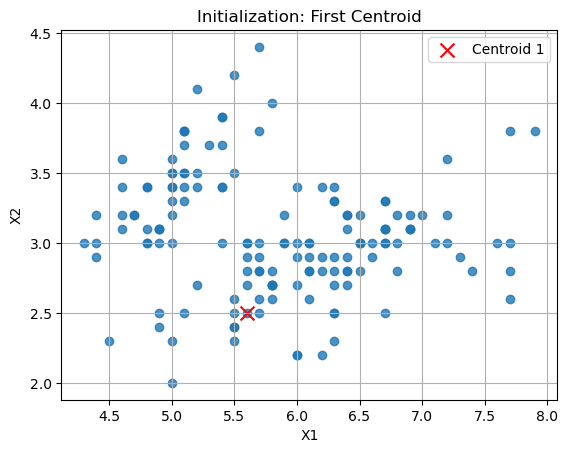

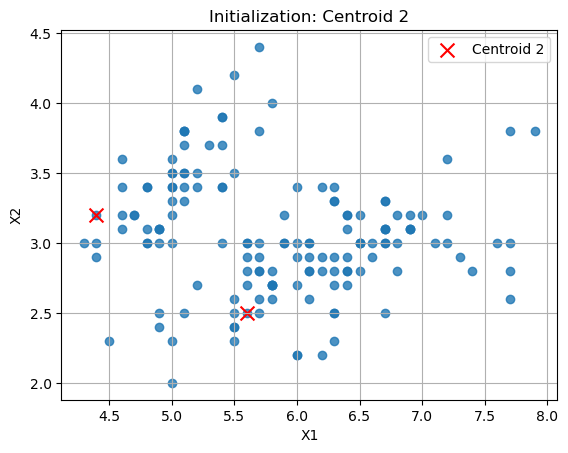

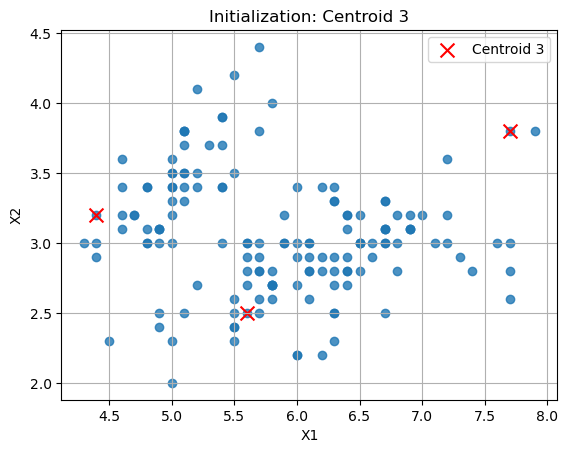

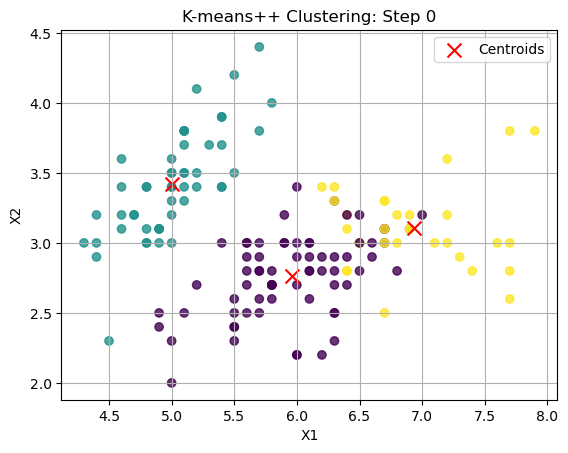

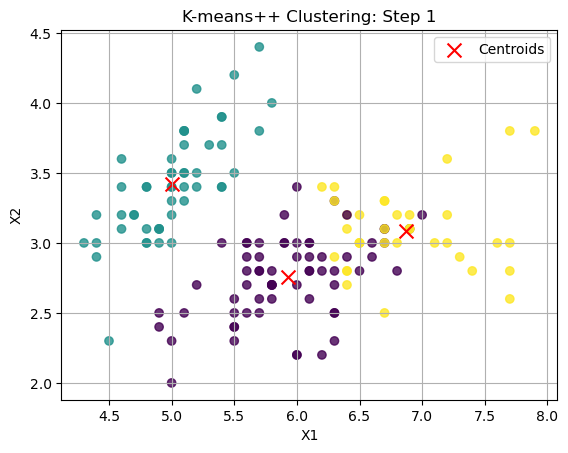

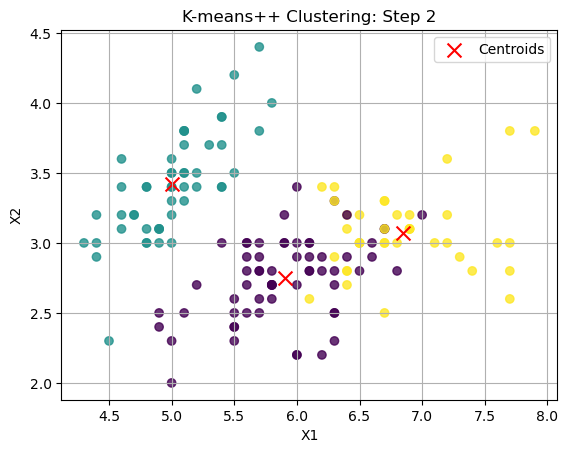

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the number of clusters and initialize random seed
K = 3
np.random.seed(123)

# Function to compute Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-means++ initialization with enhanced distance checking
def initialize_centroids_kmeans_plus_plus(data, K):
    centroids = [data[np.random.randint(data.shape[0])]]

    # Visualize the first centroid
    plt.scatter(data[:, 0], data[:, 1], alpha=0.8)
    plt.scatter(centroids[0][0], centroids[0][1], c='red', marker='x', s=100, label='Centroid 1')
    plt.title('Initialization: First Centroid')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.legend()
    plt.show()

    for i in range(1, K):
        distances = np.array([min([euclidean_distance(point, centroid) for centroid in centroids]) for point in data])
        probs = distances ** 3 / np.sum(distances ** 3)
        new_centroid_index = np.random.choice(data.shape[0], p=probs)
        centroids.append(data[new_centroid_index])

        # Visualizing the next centroid chosen
        plt.scatter(data[:, 0], data[:, 1], alpha=0.8)
        plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], c='red', marker='x', s=100, label=f'Centroid {i+1}')
        plt.title(f'Initialization: Centroid {i+1}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.grid(True)
        plt.legend()
        plt.show()

    return np.array(centroids)

# Main K-means++ algorithm with centroid separation enforcement
def k_means_plus_plus(data, K, steps=5, min_distance=0.1):
    centroids = initialize_centroids_kmeans_plus_plus(data, K)

    for step in range(steps):
        clusters = []
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster = np.argmin(distances)
            clusters.append(cluster)

        clusters = np.array(clusters)

        new_centroids = np.zeros_like(centroids)
        for k in range(K):
            points_in_cluster = data[clusters == k]
            if len(points_in_cluster) > 0:
                new_centroid = points_in_cluster.mean(axis=0)

                # Enforce minimum distance constraint
                while any(euclidean_distance(new_centroid, centroid) < min_distance for centroid in new_centroids[:k]):
                    new_centroid += np.random.normal(0, 0.1, size=new_centroid.shape)  # Perturb the new centroid

                new_centroids[k] = new_centroid

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

        # Ploting the clusters and centroids using only X1 and X2 for visualization
        plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.8)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means++ Clustering: Step {step}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.grid(True)
        plt.legend()
        plt.show()

k_means_plus_plus(data, K)


k-means++ is considering centriods that are from each other. During the iterative steps of the K-means algorithm, the centroids may be recalculated to be close to each other due to the nature of the data distribution.

K-Nearest Neighbors (KNN) Classification

In [ ]:
df_new = pd.read_csv('cluster_data2.csv')
df_new.head()

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05


In [ ]:
data_new = df_new[['X1', 'X2', 'X3', 'X4']].values

In [ ]:
# Checking for missing values
print(df_new.isnull().sum())

# Handling missing values
df_new.fillna(df.mean(), inplace=True)

X1    0
X2    0
X3    0
X4    0
dtype: int64


In [ ]:
# Removing duplicate rows
df_new.drop_duplicates(inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the data
scaler = MinMaxScaler()
data_new = scaler.fit_transform(df_new[['X1', 'X2', 'X3', 'X4']])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
data_new = scaler.fit_transform(df_new[['X1', 'X2', 'X3', 'X4']])

In [ ]:
from scipy import stats

# Removing outliers based on the Z-score method
z_scores = np.abs(stats.zscore(df_new[['X1', 'X2', 'X3', 'X4']]))
df_new = df_new[(z_scores < 3).all(axis=1)]

In [ ]:
# the correlation matrix
correlation_matrix = df_new[['X1', 'X2', 'X3', 'X4']].corr()
print(correlation_matrix)

          X1        X2        X3        X4
X1  1.000000 -0.633260  0.975206  0.971375
X2 -0.633260  1.000000 -0.762394 -0.707132
X3  0.975206 -0.762394  1.000000  0.990891
X4  0.971375 -0.707132  0.990891  1.000000


In [ ]:
# Taking data and clusters from problem #2 thatare already available
import numpy as np
import pandas as pd
from collections import Counter

# Function to compute Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# KNN classification algorithm
def knn_classification(train_data, train_labels, test_point, k=3):
    # Compute distances between test_point and all train_data points
    distances = [euclidean_distance(test_point, train_point) for train_point in train_data]

    # Geting the indices of the k nearest neighbors
    nearest_neighbors_indices = np.argsort(distances)[:k]

    # Geting the classes of the k nearest neighbors
    nearest_neighbors_classes = [train_labels[idx] for idx in nearest_neighbors_indices]

    # Determining the most common class among the k nearest neighbors
    most_common_class = Counter(nearest_neighbors_classes).most_common(1)[0][0]
    return most_common_class

# Assigning class to each data point in cluster_data2.csv based on KNN
k_value = 3  # You can change the value of k if needed
class_assignments = []

for point in data_new:
    assigned_class = knn_classification(data, clusters, point, k=k_value)
    class_assignments.append(assigned_class)

# Create a DataFrame to display the results
results_df = pd.DataFrame(data_new, columns=['X1', 'X2', 'X3', 'X4'])
results_df['Class'] = class_assignments

# Print the DataFrame
print("Class assignments for each data point:")
print(results_df)

Class assignments for each data point:
      X1    X2    X3    X4  Class
0   5.21  3.65  1.42  0.25      0
1   5.07  3.41  1.43  0.19      0
2   5.85  2.65  4.14  1.27      2
3   5.64  2.73  4.03  1.23      0
4   6.55  2.90  5.54  2.05      2
5   5.83  2.75  4.27  1.34      0
6   4.86  3.31  1.45  0.22      0
7   6.63  2.96  5.50  1.93      2
8   5.01  3.39  1.55  0.27      0
9   6.45  3.03  5.33  2.17      2
10  6.10  2.87  4.37  1.38      1
11  6.74  3.04  5.62  1.94      1
12  4.88  3.33  1.47  0.29      0
13  6.57  2.94  5.77  2.04      2
14  6.26  2.85  4.49  1.41      1
